## Setup

In [1]:
!pip uninstall --quiet -y torch torchaudio torchdata torchtext torchvision fastai
!pip install --quiet torch==1.12.1+cu113 -f https://download.pytorch.org/whl/torch_stable.html
!pip install --quiet ase==3.21.*
!pip install --quiet --no-index torch-scatter torch-sparse torch-cluster -f https://data.pyg.org/whl/torch-1.12.0+cu113.html
!pip install --quiet torch-geometric -f https://data.pyg.org/whl/torch-1.12.0+cu113.html
!git clone https://github.com/Fung-Lab/ActiveStructOpt.git
%cd ActiveStructOpt
!pip install --quiet -r requirements.txt
!pip install --quiet -e .
!git clone https://github.com/Fung-Lab/MatDeepLearn_dev


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 10.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Cloning into 'ActiveStructOpt'...
remote: Enumerating objects: 468, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 468 (delta 1), reused 1 (delta 1), pack-reused 466
Receiving objects: 100% (468/468), 673.81 KiB | 793.00 KiB/s, done.
Resolving deltas: 100% (262/262), done.
/content/ActiveStructOpt
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 96.1 MB/s eta 0

In [2]:
import activestructopt.dataset.materialsproject
import activestructopt.dataset.rdf
import activestructopt.dataset.dataset
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%cd MatDeepLearn_dev
!pip install -e .
!cp /content/ActiveStructOpt/activestructopt/gnn/config.yml /content/ActiveStructOpt/MatDeepLearn_dev/configs/

/content/ActiveStructOpt/MatDeepLearn_dev
Obtaining file:///content/ActiveStructOpt/MatDeepLearn_dev
  Preparing metadata (setup.py) ... done
  Running setup.py develop for matdeeplearn


In [4]:
import activestructopt.gnn.ensemble

## Generate Data

In [ ]:
target_structure = activestructopt.dataset.materialsproject.get_structure('mp-22526', 'YOUR_API_KEY_HERE')

In [6]:
structures, train_indices, val_indices, test_indices = activestructopt.dataset.dataset.write_data_splits(
  target_structure,
  '/content/ActiveStructOpt/MatDeepLearn_dev/data',
  activestructopt.dataset.rdf.get_rdf,
  {'σ': 0.1, 'max_r': 12.})

## GNN Inference

In [7]:
ensemble = activestructopt.gnn.ensemble.Ensemble(5, '/content/ActiveStructOpt/MatDeepLearn_dev/configs/config.yml')

In [8]:
ensemble.train()

In [9]:
test_structure = structures[test_indices[0]]
pred_mean, pred_std = ensemble.predict(test_structure)

<ErrorbarContainer object of 3 artists>

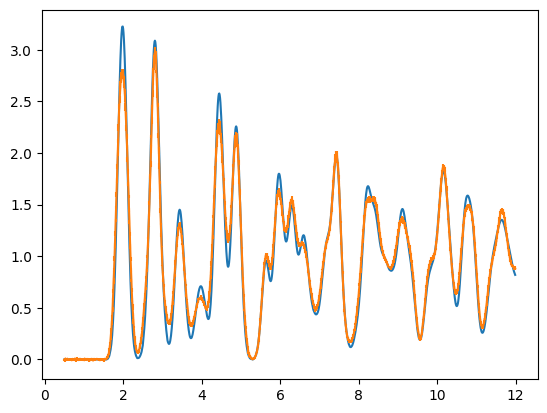

In [10]:
rs = np.arange(0.5, 12.0, 0.01)
target_rdf = activestructopt.dataset.rdf.get_rdf(test_structure, σ = 0.1, max_r = 12.)
plt.plot(rs, target_rdf, label = 'target')
plt.errorbar(rs, pred_mean, yerr = pred_std)